In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df[:5]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

df1 = pd.DataFrame(mm.fit_transform(df)) #Normalization
df1.columns = df.columns
df1.index = df.index

In [4]:
df1

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0.0000,0.045455,0.086957,0.189815,0.936527,1.000000,0.16,0.0,0.000000,0.0,1.0,0.0,0.0,0.0
1,0.0002,0.500000,0.478261,0.120370,0.924872,0.666667,0.15,0.0,0.000000,0.0,1.0,0.0,0.0,0.0
2,0.0004,0.363636,0.391304,0.013889,0.977892,0.000000,0.10,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0006,0.272727,0.260870,0.425926,0.970931,0.000000,0.27,0.5,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0008,0.272727,0.239130,0.171296,0.939080,1.000000,0.10,0.5,0.000000,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.9992,0.136364,0.130435,0.148148,0.954731,0.000000,0.19,1.0,0.000000,0.0,0.0,0.0,1.0,0.0
4996,0.9994,0.159091,0.152174,0.032407,0.947174,1.000000,0.04,0.0,0.133858,0.0,0.0,0.0,1.0,0.0
4997,0.9996,0.909091,0.913043,0.074074,0.958463,0.333333,0.03,1.0,0.000000,0.0,0.0,0.0,0.0,0.0
4998,0.9998,0.954545,0.934783,0.189815,0.924242,0.666667,0.05,0.5,0.000000,0.0,0.0,0.0,1.0,0.0


In [5]:
df1['Personal Loan'].value_counts()

0.0    4520
1.0     480
Name: Personal Loan, dtype: int64

In [6]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

## SMOTE Oversampling

In [7]:
X = df1.drop(['Personal Loan','ID'], axis=1)
y = df1['Personal Loan']

In [8]:
X[:5]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0.045455,0.086957,0.189815,0.936527,1.000000,0.16,0.0,0.0,1.0,0.0,0.0,0.0
1,0.500000,0.478261,0.120370,0.924872,0.666667,0.15,0.0,0.0,1.0,0.0,0.0,0.0
2,0.363636,0.391304,0.013889,0.977892,0.000000,0.10,0.0,0.0,0.0,0.0,0.0,0.0
3,0.272727,0.260870,0.425926,0.970931,0.000000,0.27,0.5,0.0,0.0,0.0,0.0,0.0
4,0.272727,0.239130,0.171296,0.939080,1.000000,0.10,0.5,0.0,0.0,0.0,0.0,1.0


In [9]:
y.value_counts()

0.0    4520
1.0     480
Name: Personal Loan, dtype: int64

In [10]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1.0    4520
0.0    4520
Name: Personal Loan, dtype: int64

## Feature Selection

In [11]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [12]:
best_feat = SelectKBest(score_func=chi2, k=9)
fit = best_feat.fit(X_sm,y_sm)

In [13]:
df_scores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
final_df = pd.concat([dfcolumns, df_scores], axis=1)
final_df.columns = ['Feature', 'Score']
final_df.sort_values(by=['Score'], inplace=True, ascending=False)
final_df

,Feature,Score
9,CD Account,910.757270
2,Income,653.314388
5,CCAvg,378.170947
6,Education,160.637703
7,Mortgage,68.904850
4,Family,33.780211
8,Securities Account,11.585106
0,Age,0.561942
1,Experience,0.459404
10,Online,0.180482


Text(0, 0.5, 'CANDIDATE NAME')

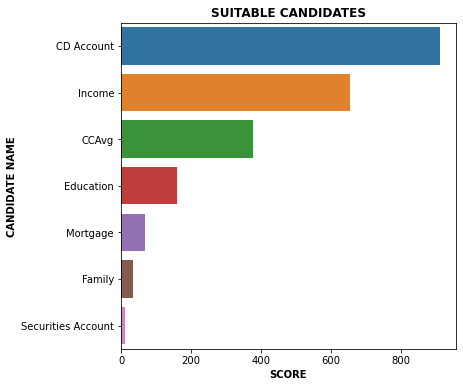

In [20]:
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib import figure

plt.figure(figsize=(6,6))
ax = sn.barplot(x=final_df['Score'].head(20), y=final_df['Feature'].head(7))
plt.title('SUITABLE CANDIDATES', weight='bold')
plt.xlabel('SCORE', weight='bold')
plt.ylabel('CANDIDATE NAME', weight='bold')